In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### 1. Load the dataset and explore the variables.

In [2]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df = df.rename(columns = {'customerID':'CustomerID', 'gender':'Gender', 'tenure':'Tenure'})
df.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
sum(df.duplicated())

0

In [7]:
df.isna().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

In [8]:
data = df[['Tenure','SeniorCitizen', 'MonthlyCharges', 'Churn']]
data

,Tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [9]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
data.dtypes

Tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
Churn              object
dtype: object

In [11]:
def indicating(x):
    if x == 'No':
        return 0
    else:
        return 1
data['Churn'] = data['Churn'].apply(indicating)

data.head()

,Tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1


### 3. Extract the target variable.

In [12]:
y = data['Churn']

### 4. Extract the independent variables and scale them.

In [13]:
X = data.drop(['Churn'], axis = 1)

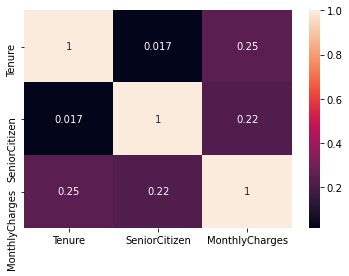

In [14]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [16]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,Tenure,SeniorCitizen,MonthlyCharges
0,1.612532,-0.439763,0.674154
1,-0.747907,2.273954,-0.614894
2,1.571835,-0.439763,-1.335097
3,0.025340,-0.439763,0.301578
4,0.595101,-0.439763,1.128231


In [17]:
y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

### 5. Build the logistic regression model.

In [18]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [19]:
LR.score(X_test_scaled, y_test)

0.7821149751596878

In [20]:
#logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

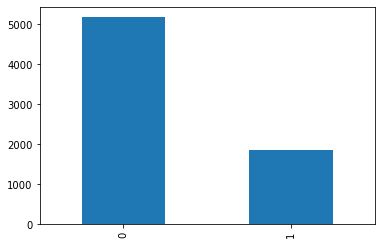

In [21]:
count = data['Churn'].value_counts()
count.plot(kind = 'bar');

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6101083032490975
recall:  0.4592391304347826
f1:  0.524031007751938


#### Oversampling / undersampling

In [23]:
from sklearn.utils import resample

In [24]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,Tenure,SeniorCitizen,MonthlyCharges,Churn
0,1.612532,-0.439763,0.674154,0
1,-0.747907,2.273954,-0.614894,0
2,1.571835,-0.439763,-1.335097,0
3,0.025340,-0.439763,0.301578,1
4,0.595101,-0.439763,1.128231,1


In [25]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[933, 108],
       [199, 169]], dtype=int64)

#### Oversampling

In [27]:
no_charn = train[train['Churn']==0]
yes_charn = train[train['Churn']==1]

In [28]:
display(no_charn.shape)
display(yes_charn.shape)

(4133, 4)

(1501, 4)

In [29]:
yes_charn_oversampled = resample(yes_charn, 
                                    replace=True, 
                                    n_samples = len(no_charn),
                                    random_state=0)

In [30]:
display(no_charn.shape)
display(yes_charn_oversampled.shape)

(4133, 4)

(4133, 4)

In [31]:
train_oversampled = pd.concat([no_charn,yes_charn_oversampled],axis=0)
train_oversampled.head()

,Tenure,SeniorCitizen,MonthlyCharges,Churn
0,1.612532,-0.439763,0.674154,0
1,-0.747907,2.273954,-0.614894,0
2,1.571835,-0.439763,-1.335097,0
5,-0.422330,-0.439763,0.642552,0
7,0.798588,-0.439763,1.108272,0


In [32]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [33]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4759259259259259
recall:  0.6983695652173914
f1:  0.5660792951541851


In [34]:
confusion_matrix(y_test,pred)

array([[758, 283],
       [111, 257]], dtype=int64)

#### Undersampling

In [35]:
no_charn_undersampled = resample(no_charn, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_charn),
                                    random_state=0)

In [36]:
display(yes_charn.shape)
display(no_charn_undersampled.shape)

(1501, 4)

(1501, 4)

In [37]:
train_undersampled = pd.concat([yes_charn,no_charn_undersampled], axis = 0)
train_undersampled.head()

,Tenure,SeniorCitizen,MonthlyCharges,Churn
3,0.025340,-0.439763,0.301578,1
4,0.595101,-0.439763,1.128231,1
6,-0.747907,2.273954,1.176467,1
9,-1.276971,2.273954,-0.508443,1
11,1.449743,-0.439763,1.607258,1


In [38]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [39]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.47227191413237923
recall:  0.717391304347826
f1:  0.5695792880258899


In [40]:
confusion_matrix(y_test,pred)

array([[746, 295],
       [104, 264]], dtype=int64)

### 8. Synthetic Minority Oversampling TEchnique (SMOTE)

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
sm = SMOTE(random_state=100,k_neighbors=7)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [43]:
X_train_SMOTE.shape

(8266, 3)

In [44]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.47387387387387386
recall:  0.7146739130434783
f1:  0.5698808234019501


In [45]:
confusion_matrix(y_test,pred)

array([[749, 292],
       [105, 263]], dtype=int64)

In [46]:
263/(263+105)

0.7146739130434783